In [1]:
import pandas as pd
import numpy as np

mtcars = pd.read_csv('mtcars.csv')

In [2]:
mtcars.shape

(32, 12)

mtcars dataset has 32 samples and 12 features

## Data cleanup

In [3]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Car model variable will not be necessary for further analysis

In [4]:
mtcars.drop(columns=['Unnamed: 0'], inplace=True)

Rename columns for interpretability

In [5]:
mtcars.rename(columns={
               'mpg':'Miles Per Gallon',
               'cyl': 'Number of Cylinders',
               'disp':'Displacement',
               'hp':'Horse Power', 
               'drat':'Rear axle ratio',
               'wt':'Weight',
               'qsec':'Quarter Mile Time',
               'vs':'Engine Type',
               'am':'Transmission',
               'gear':'Number of forward gears',
               'carb':'Number of carburetors'}, inplace=True)

Replace numeric variables with categorical representation

In [6]:
mtcars_ = mtcars.replace({'Transmission': {0:'Automatic', 1:'Manual'},'Engine Type': {0:'V-shaped',1:'Straight'}}, inplace=False)

## General

Number of unique values

In [7]:
mtcars_.nunique()

Miles Per Gallon           25
Number of Cylinders         3
Displacement               27
Horse Power                22
Rear axle ratio            22
Weight                     29
Quarter Mile Time          30
Engine Type                 2
Transmission                2
Number of forward gears     3
Number of carburetors       6
dtype: int64

Check for missing values

In [8]:
mtcars_.isna().sum()

Miles Per Gallon           0
Number of Cylinders        0
Displacement               0
Horse Power                0
Rear axle ratio            0
Weight                     0
Quarter Mile Time          0
Engine Type                0
Transmission               0
Number of forward gears    0
Number of carburetors      0
dtype: int64

Descriptive statistics 

In [9]:
mtcars_.describe()

,Miles Per Gallon,Number of Cylinders,Displacement,Horse Power,Rear axle ratio,Weight,Quarter Mile Time,Number of forward gears,Number of carburetors
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,5.000000,8.0000


# Univariate analysis

In [10]:
samples = mtcars_.shape[0]
manuals = len(mtcars_[mtcars_['Transmission']=='Manual'])/samples
automatics = 1 - manuals


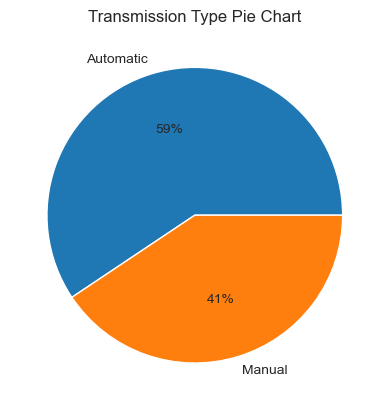

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie([automatics, manuals], labels=['Automatic', 'Manual'], autopct='%.0f%%')
plt.title('Transmission Type Pie Chart')
plt.savefig('Documents/plots/mtcars_classpie.png')


Count of target classes, to check for dataset balance

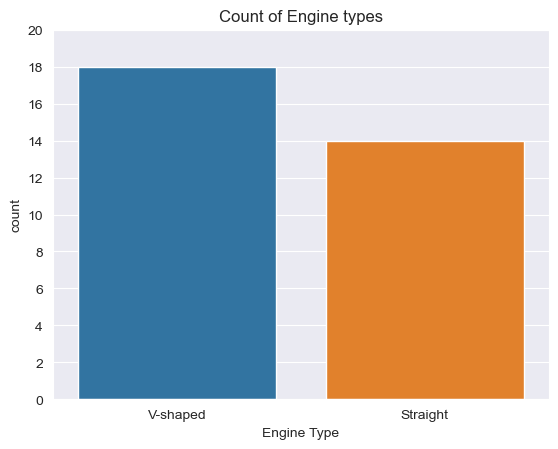

In [12]:
vs_countplot = sns.countplot(data=mtcars_, x='Engine Type')
vs_countplot.set(title='Count of Engine types')
vs_countplot.set_yticks(range(0,22,2))

plt.show()

Count of Engine types

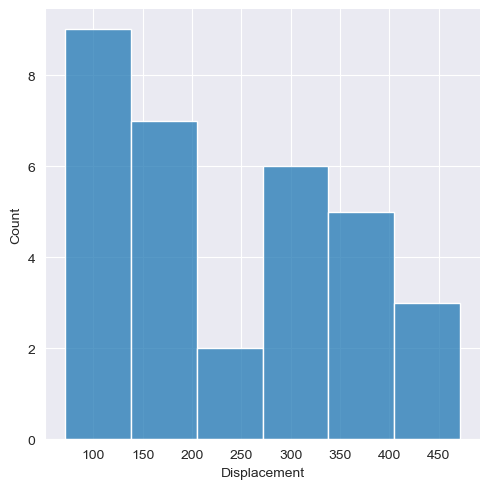

In [13]:
sns.displot(data=mtcars_,x='Displacement')

Distribution graph of Displacement

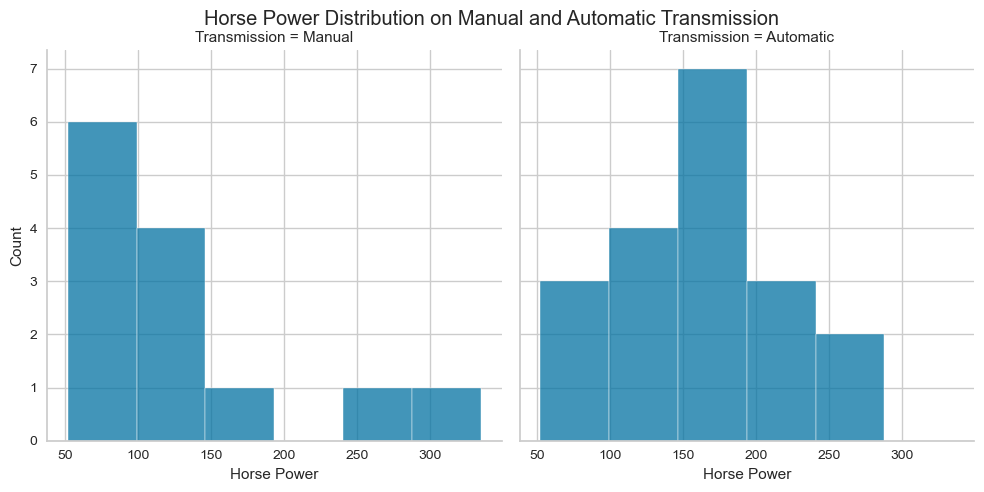

In [58]:
fg = sns.displot(data=mtcars_,x='Horse Power',col='Transmission')
fg.figure.subplots_adjust(top=0.9)
fg.figure.suptitle('Horse Power Distribution on Manual and Automatic Transmission')
fg.savefig('Documents/plots/mtcars_hpdist.png')

Distribution graph of Horse Power

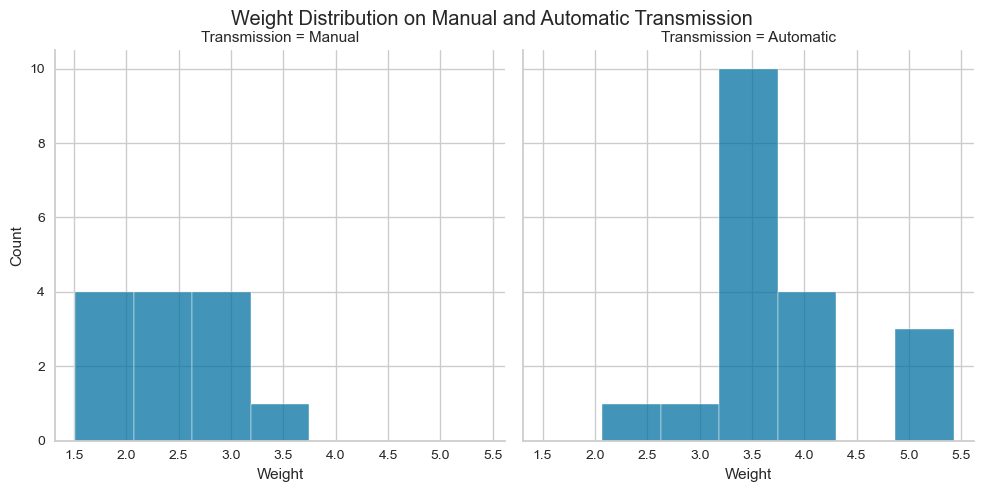

In [59]:
fg = sns.displot(data=mtcars_,x='Weight',col='Transmission')
fg.figure.subplots_adjust(top=0.9)
fg.figure.suptitle('Weight Distribution on Manual and Automatic Transmission')
fg.savefig('Documents/plots/mtcars_wtdist.png')

Distribution graph of Weight

<Axes: xlabel='Number of forward gears', ylabel='count'>

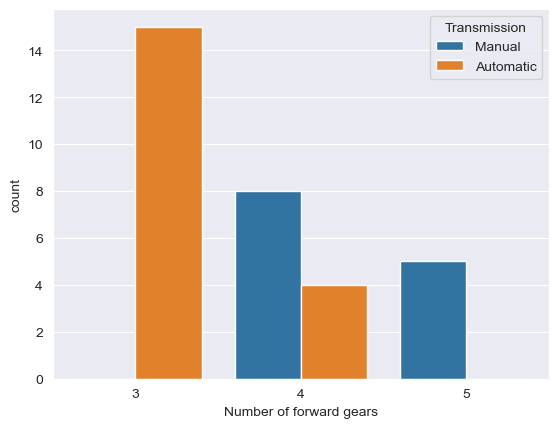

In [16]:
sns.countplot(mtcars_, x='Number of forward gears', hue='Transmission').set(title='Count of Number Of Forward Gears')
plt.savefig('Documents/plots/mtcars_gears.png')

Counts of forward gears

# Bivariate analysis

## Scatter plots

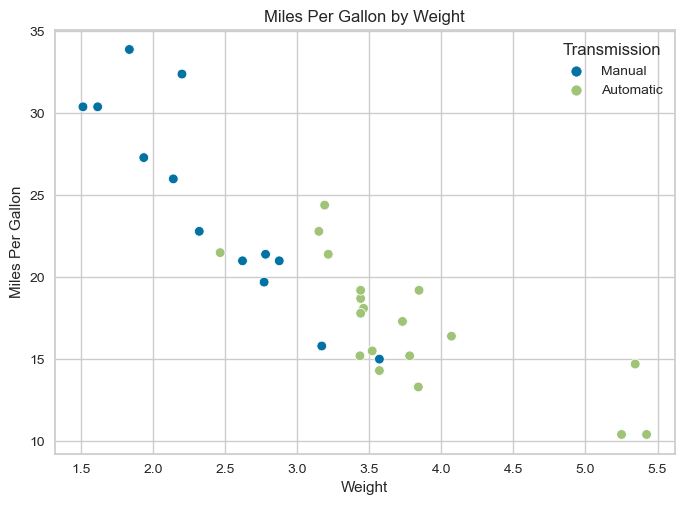

In [45]:
sns.scatterplot(data=mtcars_, x='Weight', y='Miles Per Gallon' ,hue='Transmission').set(title='Miles Per Gallon by Weight')
plt.savefig('Documents/plots/mtcars_mpgbywt.png')

<Axes: xlabel='Displacement', ylabel='Number of Cylinders'>

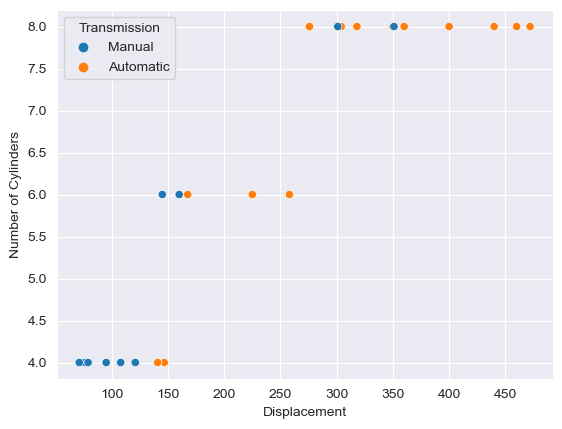

In [18]:
sns.scatterplot(data=mtcars_, x='Displacement', y='Number of Cylinders' ,hue='Transmission')

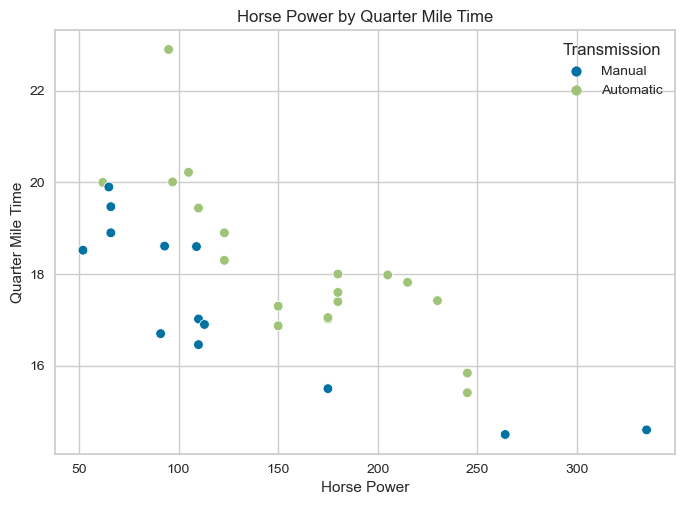

In [46]:
sns.scatterplot(data=mtcars_, x='Horse Power', y='Quarter Mile Time' ,hue='Transmission').set(title='Horse Power by Quarter Mile Time')
plt.savefig('Documents/plots/mtcars_hpbyqmt.png')

## Bar charts

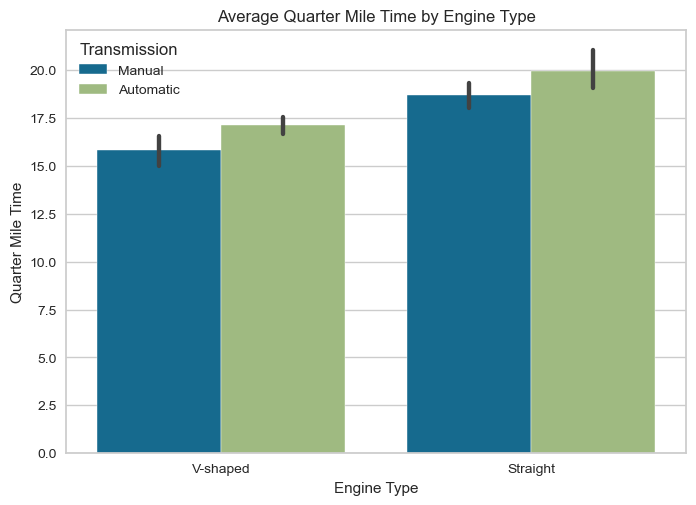

In [47]:
sns.barplot(data=mtcars_,x='Engine Type', y='Quarter Mile Time', estimator='mean',hue='Transmission').set(title='Average Quarter Mile Time by Engine Type')
plt.savefig('Documents/plots/mtcars_qmtvs.png')

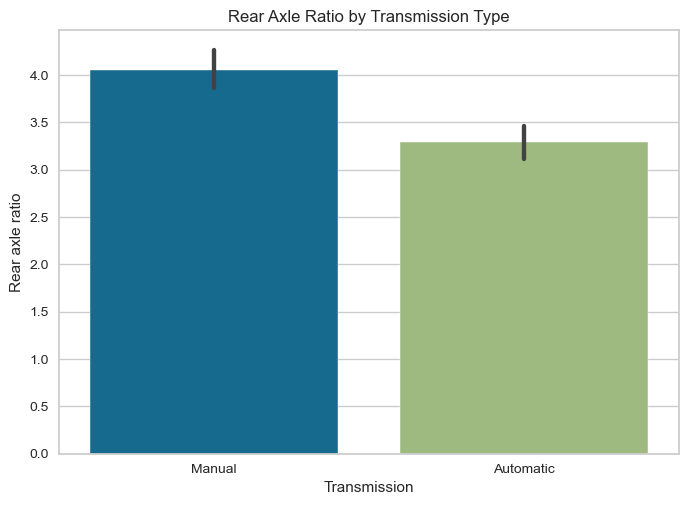

In [44]:
sns.barplot(data=mtcars_,x='Transmission', y='Rear axle ratio', estimator='mean').set(title = 'Rear Axle Ratio by Transmission Type')
plt.savefig('Documents/plots/mtcars_am_drat.png')

In [22]:
pd.crosstab(mtcars_['Engine Type'], mtcars_['Transmission'])/samples

Transmission,Automatic,Manual
Engine Type,,
Straight,0.21875,0.21875
V-shaped,0.37500,0.18750


### Simple regression lines

<Axes: xlabel='Displacement', ylabel='Weight'>

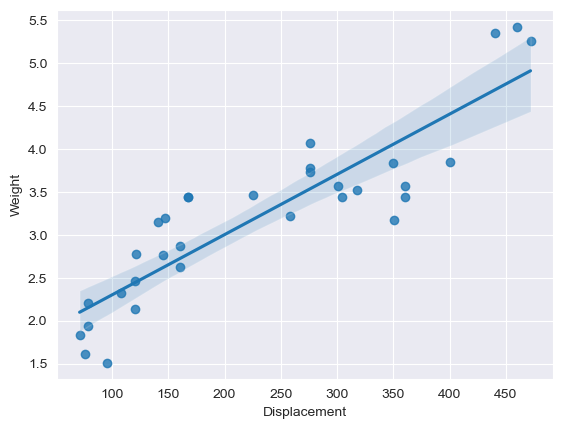

In [23]:
sns.regplot(data=mtcars, x='Displacement', y='Weight')

<Axes: xlabel='Weight', ylabel='Miles Per Gallon'>

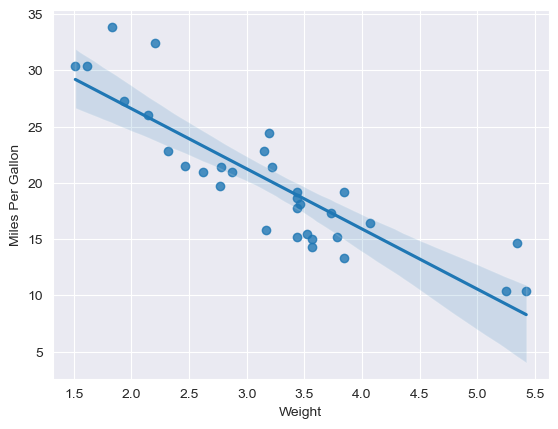

In [24]:
sns.regplot(data=mtcars, x='Weight', y='Miles Per Gallon' )

# Multivariate Analysis

In [25]:
columns = np.array(mtcars.columns)
columns = np.delete(columns, [8])

## Correlation with independent variables

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

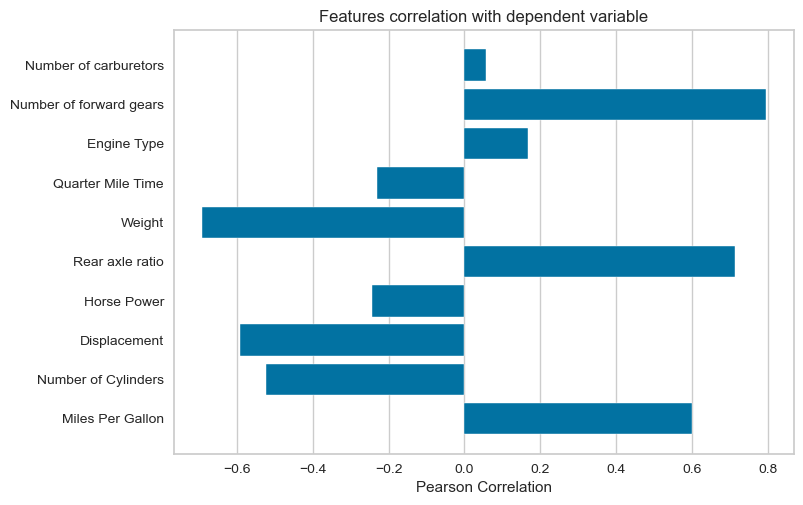

In [26]:
from yellowbrick.target import FeatureCorrelation


correlations = FeatureCorrelation(labels=np.array(columns))
correlations.fit(mtcars.drop(columns=['Transmission']), mtcars['Transmission'])
correlations.show(outpath='./Documents/plots/mtcars_targetcorrelation.png')

## All correlations

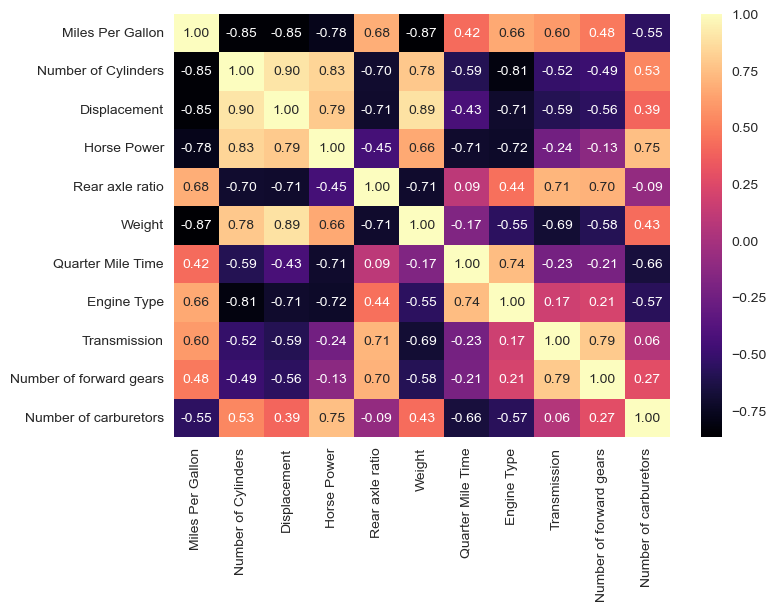

In [27]:
sns.heatmap(mtcars.corr(),cmap='magma', fmt='.2f', annot=True, annot_kws={'fontsize':'small'})
plt.savefig('./Documents/plots/mtcars_corrplot.png')
plt.show()

## Visualizing data using Dimensionality Reduction with tSNE

In [28]:
X = mtcars.drop(columns=['Transmission'])
y = mtcars_['Transmission'].values.reshape(-1,1)

Split data

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:5,:]

array([[ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.62016658, -0.78960058, -0.8819171 ,  0.43033148,  0.74696708],
       [ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.35538219, -0.47120178, -0.8819171 ,  0.43033148,  0.74696708],
       [ 0.4567366 , -1.24445674, -1.00602601, -0.7955699 ,  0.48158406,
        -0.93167763,  0.43282336,  1.13389342,  0.43033148, -1.14010764],
       [ 0.22072968, -0.10666772,  0.22361542, -0.54365487, -0.98157639,
        -0.00233633,  0.90473586,  1.13389342, -0.94672926, -1.14010764],
       [-0.23442651,  1.0311213 ,  1.05977159,  0.41954967, -0.84856181,
         0.23129695, -0.47120178, -0.8819171 , -0.94672926, -0.51108274]])

Standardize data before reducing

In [30]:

tSNE = TSNE(n_components=2, random_state=100)
mtcars_reduced = tSNE.fit_transform(X)

In [31]:
mtcars_reduced = np.c_[mtcars_reduced,y]

Append target variable as a column

In [32]:
mtcars_reduced = pd.DataFrame(mtcars_reduced, columns=['x','y','Transmission'])
mtcars_reduced.head()

,x,y,Transmission
0,-4.06785,-7.522952,Manual
1,-4.089829,-7.48309,Manual
2,-4.513988,-7.724852,Manual
3,-4.711271,-7.318202,Automatic
4,-4.354721,-6.988039,Automatic


Results of Dimensionality Reduction

## Plot reduced data

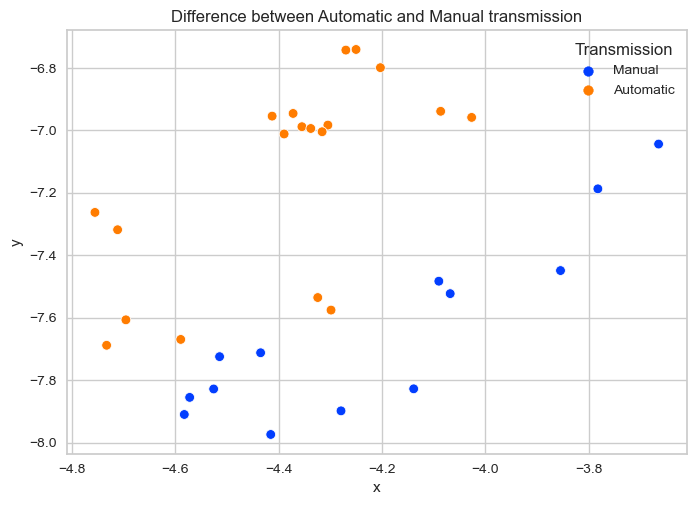

In [33]:
sns.scatterplot(data=mtcars_reduced,x='x',y='y', hue='Transmission', palette='bright').set(title='Difference between Automatic and Manual transmission')
plt.savefig('Documents/plots/mtcars_tsne_viz')